In [1]:
using Revise

In [2]:
using ColorSchemes
using Plots
using SignedDistanceFunctions

[ Info: Precompiling SignedDistanceFunctions [5d155b53-3349-4453-ad1f-ebdf13404c93]


In [3]:
# Make all plots with PNGs rather than SVG.
gr(; fmt=:png)

Plots.GRBackend()

In [9]:
function plot_sdf(g::Geometry{2})
    xs = -7.0:0.1:7.0
    ys = -5.0:0.1:5.0
    
    # NOTE That this is indexed as (y, x).
    data = Matrix{Union{Float64,Missing}}(undef, (length(ys), length(xs)))
    
    @inbounds for (j, x) in enumerate(xs)
        for (i, y) in enumerate(ys)
            data[i, j] = signed_distance(g, (x, y))
        end
    end
    
    # Compute colour gradient changeover point.
    # This is trying to make "0" always align with white in our scale.
    minv, maxv = extrema(filter(!ismissing, data))
    colour_gradient = if minv >= 0
        cgrad([:white, :red], [0, 1])
    elseif maxv <= 0
        # Zero isn't bounded by our data range, at which point we give up.
        cgrad([:blue, :white], [0, 1])
    else
        changeover_point = - minv / (maxv - minv)
        cgrad([:blue, :white, :red], [0, changeover_point, 1])
    end
    
    return heatmap(xs, ys, data; aspect_ratio=:equal, color=colour_gradient)
end

plot_sdf (generic function with 1 method)

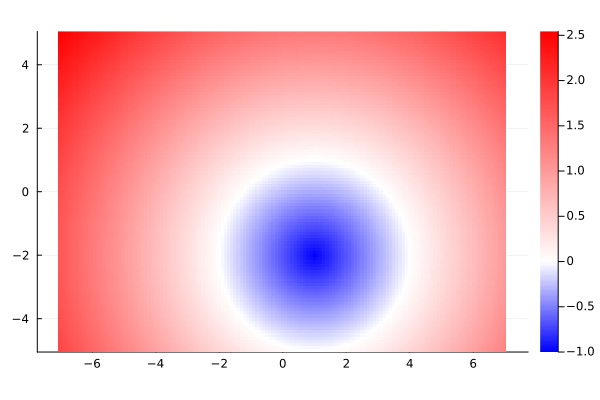

In [10]:
g = shift(scale(Sphere{2}(), 3.0), (1.0, -2.0))
plot_sdf(g)

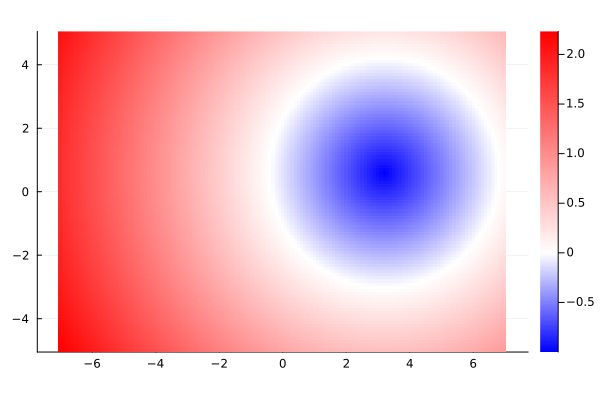

In [11]:
g2 = shift(scale(g, 1.2), (2.0, 3.0))
plot_sdf(g2)

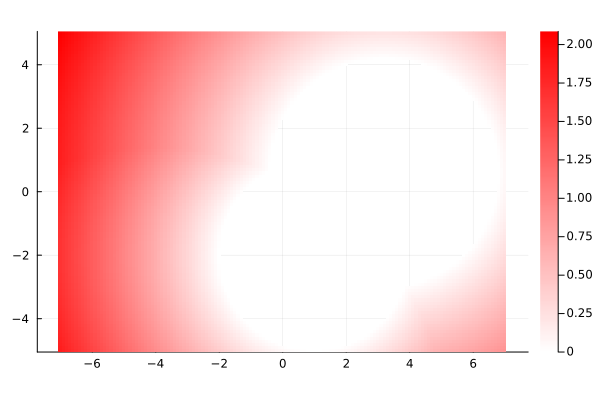

In [12]:
g3 = union(g, g2)
plot_sdf(g3)

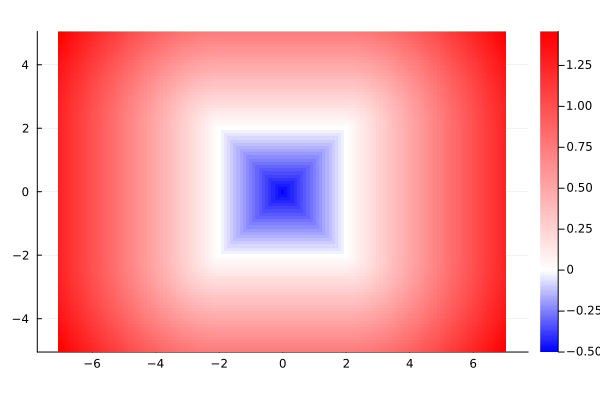

In [13]:
plot_sdf(scale(Cube{2}(), 4.0))